In [11]:
import numpy as np
from matplotlib import pyplot as plt
from os import listdir
import json

In [12]:
def get_y_val(x, xs, ys):
    for i in range(xs.shape[0]):
        if xs[i] > x:
            # This is upper bound, previous is lower bound
            if i == 0:
                end, start = xs[i], 0
                l = (x-start)/(end-start)
                return ys[i]#(l)*ys[i]
            end, start = xs[i], xs[i-1]
            l = (x-start)/(end-start)
            return (l)*ys[i] + (1-l)*ys[i-1]
    return ys[len(ys)-1]

def get_average_plot(data):
    end_time = 0
    for d in data:
        end_time = max(end_time, np.max(d[0]))
    xs = np.array(range(0, int(end_time)))
    yss = np.array([[get_y_val(x, d[0], d[1]) for x in xs] for d in data])
    ys_agv = np.mean(yss, axis=0)#np.median(yss, axis=0)#np.sum(yss, axis=0) / yss.shape[0]
    ys_std = np.std(yss, axis=0)
    return xs, ys_agv, ys_std

def average_plot(data, color=(0.02745098, 0.50588235, 0.87058824), plot_std=True, label=None):
    xs, ys_avg, ys_std = get_average_plot(data)
    if plot_std:
        plt.fill_between(xs, ys_avg-ys_std, ys_avg+ys_std, color=(color[0], color[1], color[2], 0.25))
    plt.plot(xs, ys_avg, color=color, label=label)


In [13]:
def read_database(path="./data"):
    db = []
    for filename in listdir(path):
        with open(path+"/"+filename, "r") as f:
            db.append(json.loads(f.read()))
    return db

def find_data(db, exid):
    data = []
    for d in db:
        if d['exid'] == exid:
            data.extend([np.array(x) for x in d['nodes_data']])
    return data

In [14]:
def setup_accuracy_graph(title, zoom=False):
    plt.xticks([x for x in range(0, 21, 1)])
    if zoom:
        plt.ylim(80, 90)
        plt.yticks([x for x in range(80, 91, 1)])
    else:
        plt.ylim(0, 100)
        plt.yticks([x for x in range(0, 110, 10)])
    plt.xlim(0, 20)
    plt.xlabel("Epochs Trained")
    plt.ylabel("Average Accuracy")
    plt.grid()
    plt.legend()
    plt.title(title)

In [15]:
def colors(a, b, n):
    def lerp(a,b,x):
        return (1-x)*a + x*b
    x = 1/(n-1)
    cols = []
    for ni in range(n):
        xi = ni*x
        cols.append((lerp(a[0], b[0], xi), lerp(a[1], b[1], xi), lerp(a[2], b[2], xi)))
    return cols

In [16]:
db = read_database()
print("Experiment ids:", set([data["exid"] for data in db]))

Experiment ids: {'ex3_(-0.5)_0', 'ex3_(9999)_8', 'ex3_(9999)_5', 'ex2_1', 'ex1_asr_1.0', 'ex3_(0)_8', 'ex2_-1', 'ex1_asr_0.3', 'ex3_(9999)_3', 'ex2_2', 'ex3_(0)_3', 'ex3_(0)_0', 'ex1_asr_0.5', 'ex1_asr_0.7', 'ex3_(0)_5', 'ex2_0', 'ex3_(9999)_0', 'ex3_(-0.5)_8', 'ex2_0.5', 'ex2_9999', 'ex3_(-0.5)_3', 'ex1_avg', 'ex2_-0.5', 'ex2_-2', 'ex1_asr_0.9', 'ex3_(-0.5)_5'}


# Experiement 1

In [41]:
def ex1(zoom):
    cols = colors((1,0,0), (0,1,0), 5)
    average_plot(find_data(db, "ex1_asr_0.3"), label="ASR α=0.3", color=cols[0], plot_std=False)
    average_plot(find_data(db, "ex1_asr_0.5"), label="ASR α=0.5", color=cols[1], plot_std=False)
    average_plot(find_data(db, "ex1_asr_0.7"), label="ASR α=0.7", color=cols[2], plot_std=False)
    average_plot(find_data(db, "ex1_asr_0.9"), label="ASR α=0.9", color=cols[3], plot_std=False)
    average_plot(find_data(db, "ex1_asr_1.0"), label="ASR α=1", color=cols[4], plot_std=False)
    average_plot(find_data(db, "ex1_avg"), label="AVG", color=(0,0,1), plot_std=False)
    extra = " (Zoomed)" if zoom else ""
    setup_accuracy_graph("AVG vs ASR"+extra, zoom=zoom)
    plt.show()

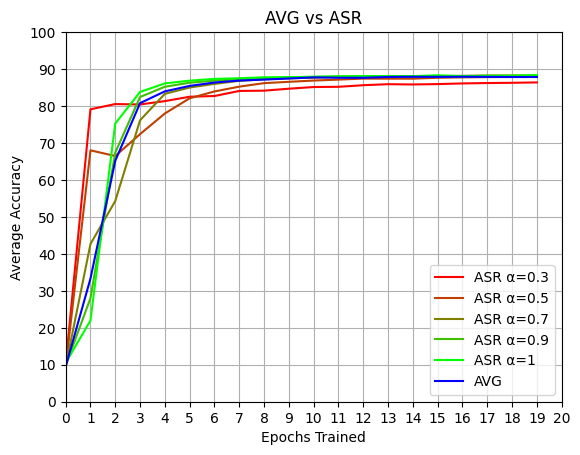

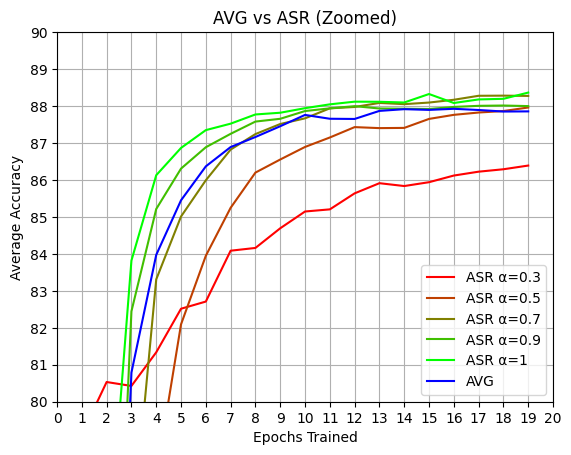

In [42]:
ex1(False)
ex1(True)

# Experiment 2

In [38]:
def ex2(zoom):
    cols = colors((1,0,0), (0,1,0), 8)
    average_plot(find_data(db, "ex2_9999"), label="β=∞", color=cols[0], plot_std=False)
    average_plot(find_data(db, "ex2_2"), label="β=2", color=cols[1], plot_std=False)
    average_plot(find_data(db, "ex2_1"), label="β=1", color=cols[2], plot_std=False)
    average_plot(find_data(db, "ex2_0.5"), label="β=0.5", color=cols[3], plot_std=False)
    average_plot(find_data(db, "ex2_0"), label="β=0", color=cols[4], plot_std=False)
    average_plot(find_data(db, "ex2_-0.5"), label="β=-0.5", color=cols[5], plot_std=False)
    average_plot(find_data(db, "ex2_-1"), label="β=-1", color=cols[6], plot_std=False)
    average_plot(find_data(db, "ex2_-2"), label="β=-2", color=cols[7], plot_std=False)
    extra = " (Zoomed)" if zoom else ""
    setup_accuracy_graph("β Variation"+extra, zoom=zoom)
    plt.show()

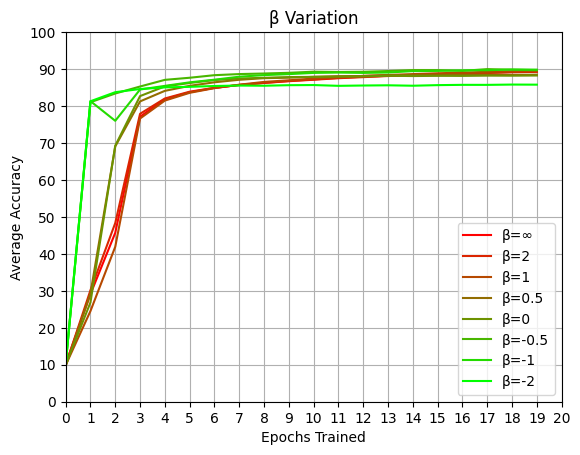

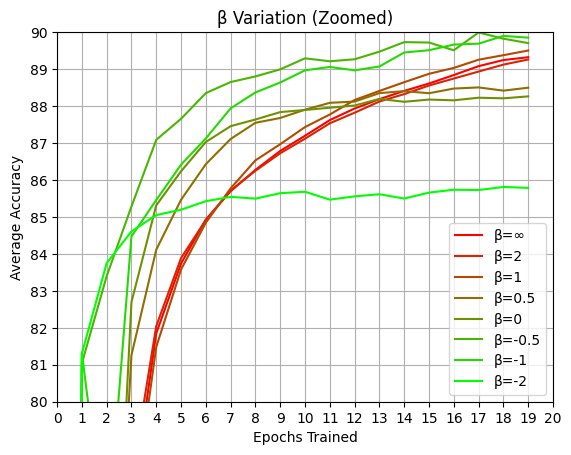

In [39]:
ex2(False)
ex2(True)

# Experiement 3


In [34]:
def ex3(beta, zoom):
    cols = colors((1,0,0), (0,1,0), 4)
    average_plot(find_data(db, f"ex3_({beta})_0"), label="γ=0", color=cols[0], plot_std=False)
    average_plot(find_data(db, f"ex3_({beta})_3"), label="γ=3", color=cols[1], plot_std=False)
    average_plot(find_data(db, f"ex3_({beta})_5"), label="γ=5", color=cols[2], plot_std=False)
    average_plot(find_data(db, f"ex3_({beta})_8"), label="γ=8", color=cols[3], plot_std=False)
    extra = " (Zoomed)" if zoom else ""
    setup_accuracy_graph("γ Variation"+extra, zoom=zoom)
    plt.show()

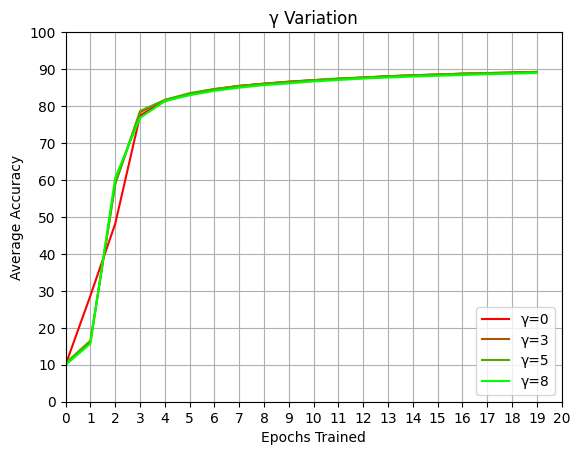

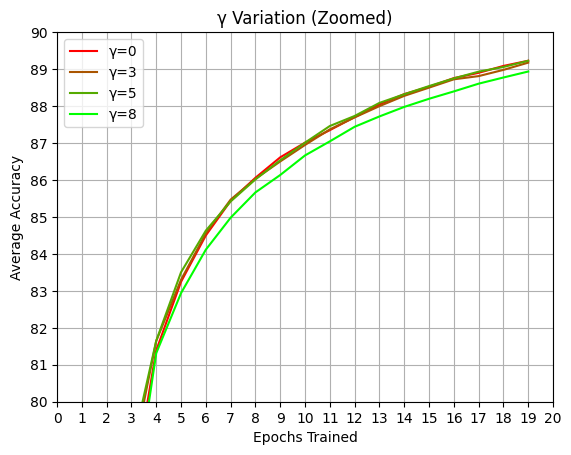

In [35]:
ex3("9999", False)
ex3("9999", True)

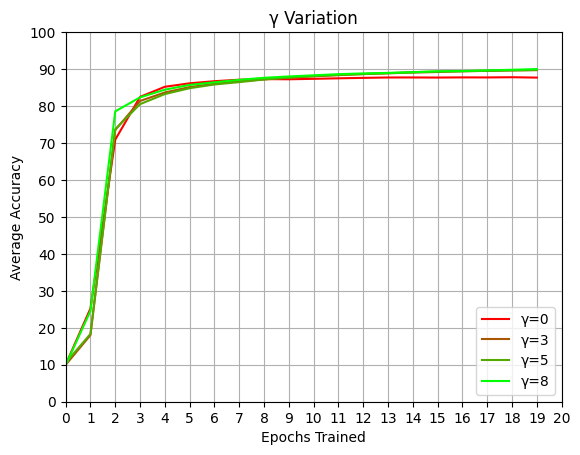

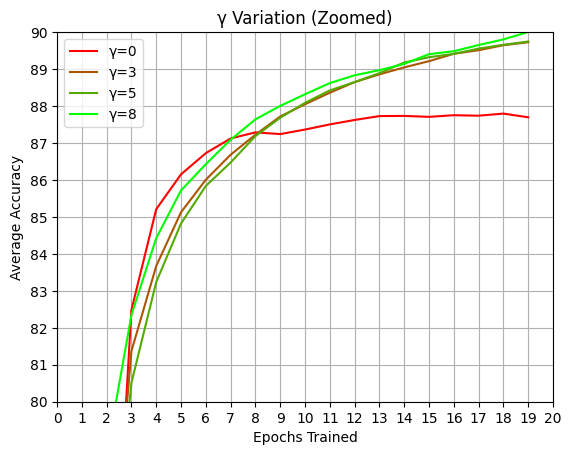

In [36]:
ex3("0", False)
ex3("0", True)

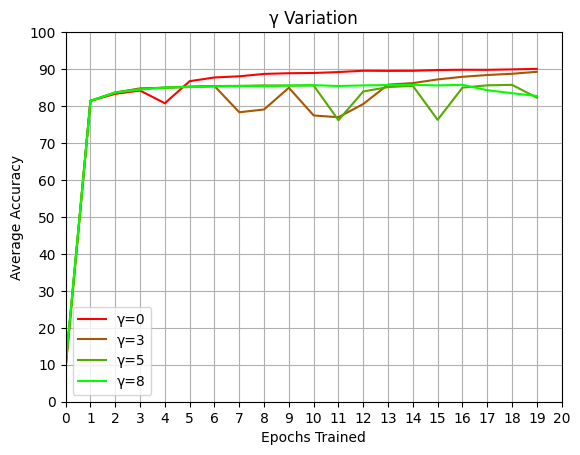

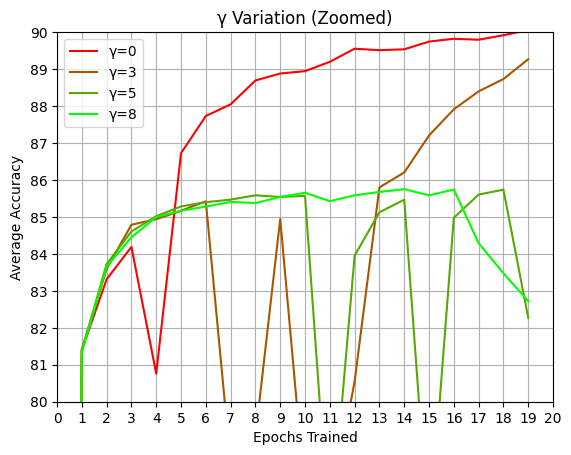

In [37]:
ex3("-0.5", False)
ex3("-0.5", True)